In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Step 1: Preprocess the data
# Separate the features and the target variable
data = pd.read_csv('/Users/mahendra/Documents/archive (3)/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [22]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
# Step 3: Train the models
# Ridge Classifier
ridge_model = RidgeClassifier()
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

In [25]:
MAE = mean_absolute_error(y_test,ridge_pred)
MAE

0.2536247259353561

In [26]:
RMSE = np.sqrt(mean_squared_error(y_test,ridge_pred))
RMSE

0.503611681690721

In [27]:
ridge_accuracy = accuracy_score(y_test, ridge_pred)
ridge_accuracy

0.7463752740646439

In [28]:
# Lasso (Logistic Regression with L1 penalty)
lasso_model = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

In [29]:
MAE = mean_absolute_error(y_test,lasso_pred)
MAE

0.25150293514392813

In [31]:
RMSE = np.sqrt(mean_squared_error(y_test,lasso_pred))
RMSE

0.501500683094179

In [32]:
lasso_accuracy = accuracy_score(y_test, lasso_pred)
lasso_accuracy

0.7484970648560718

In [33]:
# Elastic Net (Logistic Regression with Elastic Net penalty)
elastic_net_model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=10000)
elastic_net_model.fit(X_train, y_train)
elastic_net_pred = elastic_net_model.predict(X_test)

In [35]:
MAE = mean_absolute_error(y_test,elastic_net_pred)
MAE

0.25150293514392813

In [36]:
RMSE = np.sqrt(mean_squared_error(y_test,elastic_net_pred))
RMSE

0.501500683094179

In [38]:
elastic_accuracy = accuracy_score(y_test, elastic_net_pred)
elastic_accuracy

0.7484970648560718

In [40]:
from sklearn.svm import SVC

# Step 1: Preprocess the data
# The data is already standardized and split into training and testing sets from the previous steps

# Step 3: Train the model
svc_model = SVC(kernel='linear', C=1)
svc_model.fit(X_train, y_train)

# Step 4: Evaluate the model
svc_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)

svc_accuracy

0.7484263384963576

In [42]:
from sklearn.neural_network import MLPClassifier

In [44]:

# Build the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

# Train the MLP model
mlp.fit(X_train, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

In [45]:
accuracy

0.7458094631869298

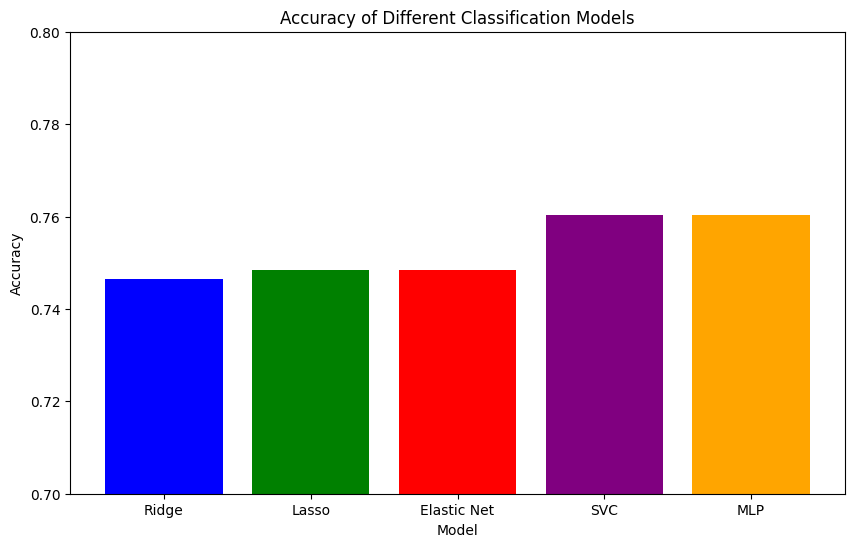

In [48]:
# Accuracy scores from previous models
ridge_accuracy = 0.7464
lasso_accuracy = 0.7485
elastic_net_accuracy = 0.7485
svc_accuracy = 0.7604
mlp_accuracy = 0.7604  # Replace with the actual MLP accuracy once calculated

# Model names and their accuracies
model_names = ['Ridge', 'Lasso', 'Elastic Net', 'SVC', 'MLP']
accuracies = [ridge_accuracy, lasso_accuracy, elastic_net_accuracy, svc_accuracy, mlp_accuracy]

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classification Models')
plt.ylim(0.7, 0.8)
plt.show()

In [50]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [52]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [57]:
data.head(1)#.drop("Diabetes_binary",axis=1)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0


In [54]:
check_df = scaler.fit_transform(data.head(1).drop("Diabetes_binary",axis=1))

In [60]:
svc_model.predict(check_df)

array([1.])

In [61]:
ridge_model.predict(check_df)

array([1.])

In [62]:
lasso_model.predict(check_df)

array([0.])

In [63]:
elastic_net_model.predict(check_df)

array([0.])

In [49]:
import statsmodels.api as sm
import pandas as pd

# Add a constant term to the predictors
X_multiple = sm.add_constant(X)

# Fit a multiple regression model
model_multiple = sm.OLS(y, X_multiple).fit()

# Print the summary of the model
print(model_multiple.summary())


                            OLS Regression Results                            
Dep. Variable:        Diabetes_binary   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     1508.
Date:                Fri, 12 Jul 2024   Prob (F-statistic):               0.00
Time:                        22:27:18   Log-Likelihood:                -38218.
No. Observations:               70692   AIC:                         7.648e+04
Df Residuals:                   70670   BIC:                         7.668e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5861 